# Step 1: Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the data from the CSV file

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')

# Step 3: Preprocess the text data

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in words if word.isalpha()]  # Remove non-alphabetic characters
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

data['v2'] = data['v2'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samatha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samatha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step 4: Split the data into training and testing sets 

In [4]:
X = data['v2']
y = data['v1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create the TF-IDF vectorizer and transform the text data 

In [5]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train the Gradient Boosting Classifier

In [6]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, y_train)

GradientBoostingClassifier(random_state=42)

# Step 7: Make predictions on the test data 

In [7]:
y_pred = clf.predict(X_test_tfidf)

# Step 8: Evaluate the model's performance 

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.96
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.98      0.73      0.84       150

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Confusion Matrix:
[[963   2]
 [ 40 110]]


# Step 9: Visualize the distribution of message lengths for both spam and ham messages 

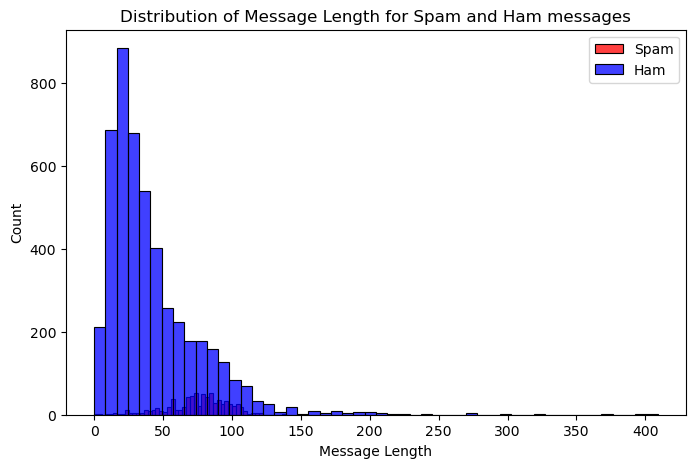

In [9]:
data['Message Length'] = data['v2'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(data[data['v1'] == 'spam']['Message Length'], bins=50, color='red', label='Spam')
sns.histplot(data[data['v1'] == 'ham']['Message Length'], bins=50, color='blue', label='Ham')
plt.title('Distribution of Message Length for Spam and Ham messages')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend()
plt.show()

# Step 10: Visualize the most important features in the Gradient Boosting Classifier 

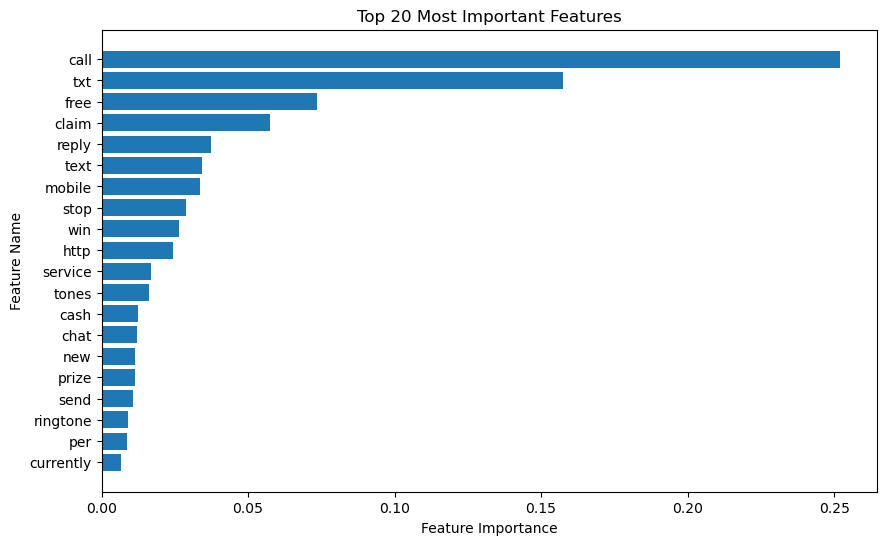

In [10]:
feature_importance = clf.feature_importances_
feature_names = vectorizer.get_feature_names_out()
top_n = 20
top_n_indices = np.argsort(feature_importance)[-top_n:]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance[top_n_indices], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in top_n_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 20 Most Important Features')
plt.show()